# Auto MPG Prediction
### Usman Bala Usman (contact.usmanusman@gmail.com)

### Project Description:
In this project, we train a linear regression model for fuel usage prediction using the classic auto MPG dataset.

The project is separated into three steps:

*   Data Processing and EDA
*   Feature Selection and Engineering
*   Model Training and Evaluation


## Imports

We load all the relevant data science and machine learning libraries required for the execution of the project.
Also, we import utility libraries to aid in our data fetching.
Data is loaded from a remote location if not present in the current runtime.

In [134]:
%pip install -q beautifulsoup4 seaborn matplotlib scikit-learn joblib


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

## EDA

In [136]:
df = pd.read_csv('auto-mpg.csv')

print(f"Dataset shape: {df.shape}")

Dataset shape: (398, 9)


In [137]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [138]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [140]:
# Statistical summary
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [141]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


### Check for Missing Values

The horsepower column contains '?' for missing values, so it's read as a string (object type).

In [142]:
# Check for '?' values in horsepower
missing_hp = df[df['horsepower'] == '?']
print(f"Rows with missing horsepower ('?'): {len(missing_hp)}")
print("\nRows with missing horsepower values:")
missing_hp

Rows with missing horsepower ('?'): 6

Rows with missing horsepower values:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


### Correlation Analysis

First, we need to handle the missing values to compute correlations.

In [143]:
df_corr = df.copy()

# Convert horsepower to numeric
df_corr['horsepower'] = pd.to_numeric(df_corr['horsepower'], errors='coerce')

# Create power-to-weight ratio to check corrilinearity with power and weight features
df_corr['power_to_weight'] = df_corr['horsepower'] / df_corr['weight']

numeric_cols = df_corr.select_dtypes(include=[np.number]).columns
print("Numeric columns:", list(numeric_cols))


Numeric columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'power_to_weight']


In [144]:
correlation_matrix = df_corr[numeric_cols].corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_to_weight
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450,-0.269699
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543,0.261069
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409,0.301134
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.611764
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024,0.149154
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873,-0.735066
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662,-0.346702
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.019217
power_to_weight,-0.269699,0.261069,0.301134,0.611764,0.149154,-0.735066,-0.346702,0.019217,1.000000


In [145]:
mpg_correlations = correlation_matrix['mpg'].sort_values(ascending=False)
print("Correlations with MPG (sorted):")
mpg_correlations

Correlations with MPG (sorted):


mpg                1.000000
model year         0.579267
origin             0.563450
acceleration       0.420289
power_to_weight   -0.269699
cylinders         -0.775396
horsepower        -0.778427
displacement      -0.804203
weight            -0.831741
Name: mpg, dtype: float64

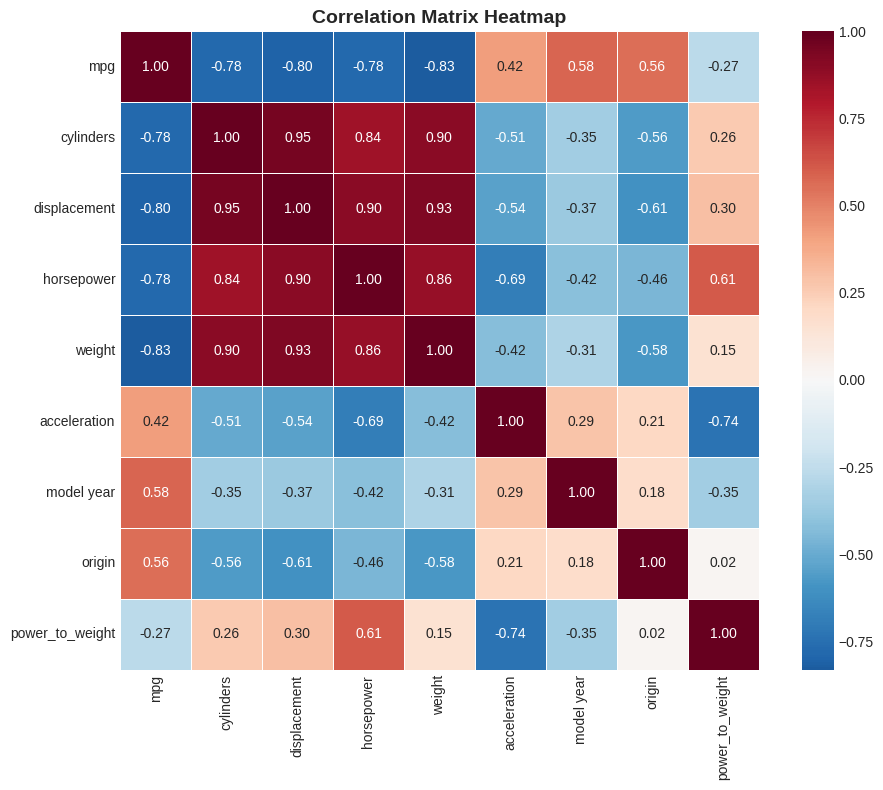

In [146]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Scatter Plots: Exploring Relationships

Let's visualize the relationships between key features and MPG.

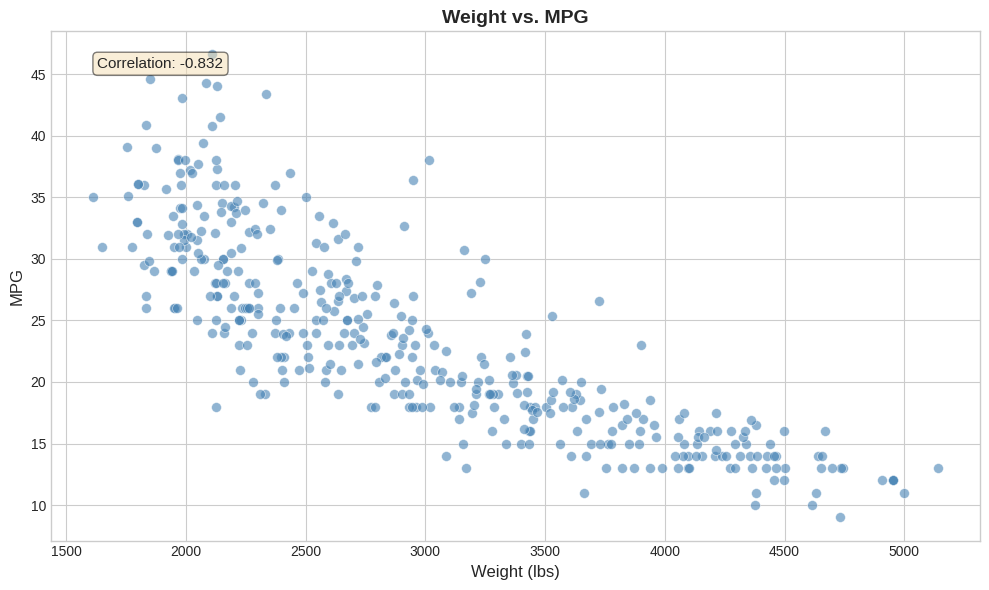

In [147]:
# Weight vs MPG
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_corr['weight'], df_corr['mpg'], alpha=0.6, edgecolors='white', linewidth=0.5, c='steelblue', s=50)
ax.set_xlabel('Weight (lbs)', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('Weight vs. MPG', fontsize=14, fontweight='bold')

corr_weight = df_corr['weight'].corr(df_corr['mpg'])
ax.annotate(f'Correlation: {corr_weight:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

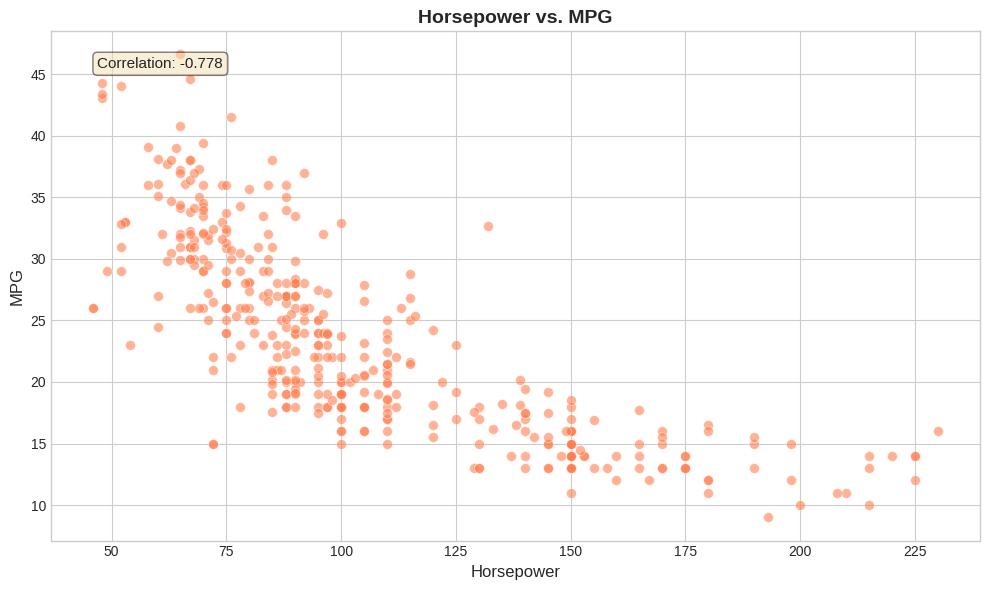

In [148]:
# Horsepower vs MPG
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_corr['horsepower'], df_corr['mpg'], alpha=0.6, edgecolors='white', linewidth=0.5, c='coral', s=50)
ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('Horsepower vs. MPG', fontsize=14, fontweight='bold')

corr_hp = df_corr['horsepower'].corr(df_corr['mpg'])
ax.annotate(f'Correlation: {corr_hp:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

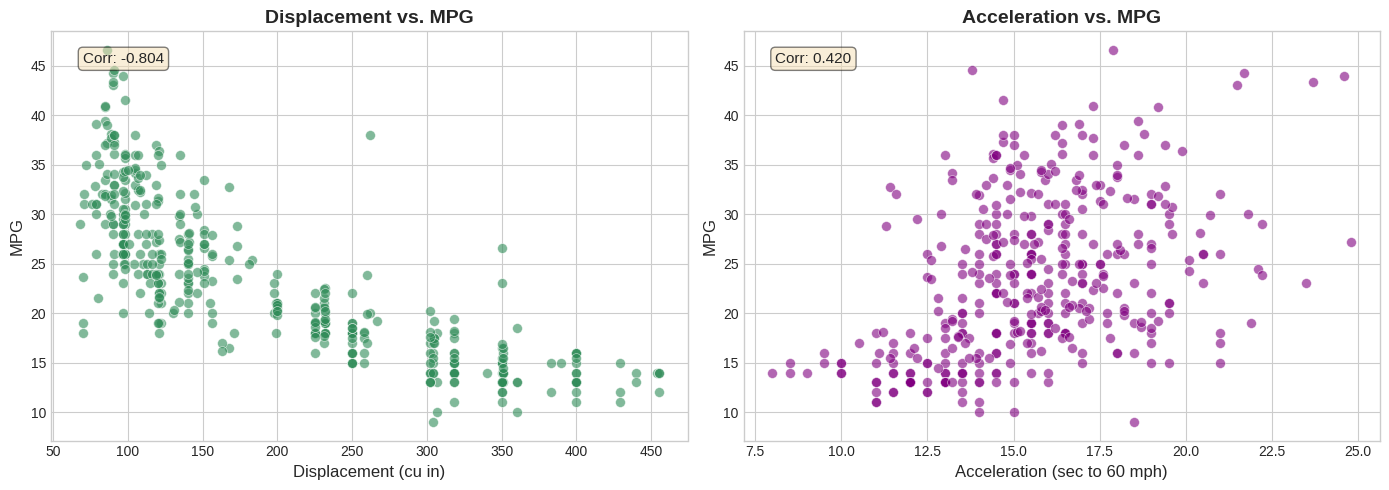

In [149]:
# Additional scatter plots: Displacement and Acceleration vs MPG
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Displacement vs MPG
axes[0].scatter(df_corr['displacement'], df_corr['mpg'], alpha=0.6, edgecolors='white', linewidth=0.5, c='seagreen', s=50)
axes[0].set_xlabel('Displacement (cu in)', fontsize=12)
axes[0].set_ylabel('MPG', fontsize=12)
axes[0].set_title('Displacement vs. MPG', fontsize=14, fontweight='bold')
corr_disp = df_corr['displacement'].corr(df_corr['mpg'])
axes[0].annotate(f'Corr: {corr_disp:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Acceleration vs MPG
axes[1].scatter(df_corr['acceleration'], df_corr['mpg'], alpha=0.6, edgecolors='white', linewidth=0.5, c='purple', s=50)
axes[1].set_xlabel('Acceleration (sec to 60 mph)', fontsize=12)
axes[1].set_ylabel('MPG', fontsize=12)
axes[1].set_title('Acceleration vs. MPG', fontsize=14, fontweight='bold')
corr_accel = df_corr['acceleration'].corr(df_corr['mpg'])
axes[1].annotate(f'Corr: {corr_accel:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### Distribution of Origin

In [150]:
# Origin distribution
print("Origin value counts:")
print("1 = USA, 2 = Europe, 3 = Asia")
print(df['origin'].value_counts().sort_index())

Origin value counts:
1 = USA, 2 = Europe, 3 = Asia
origin
1    249
2     70
3     79
Name: count, dtype: int64


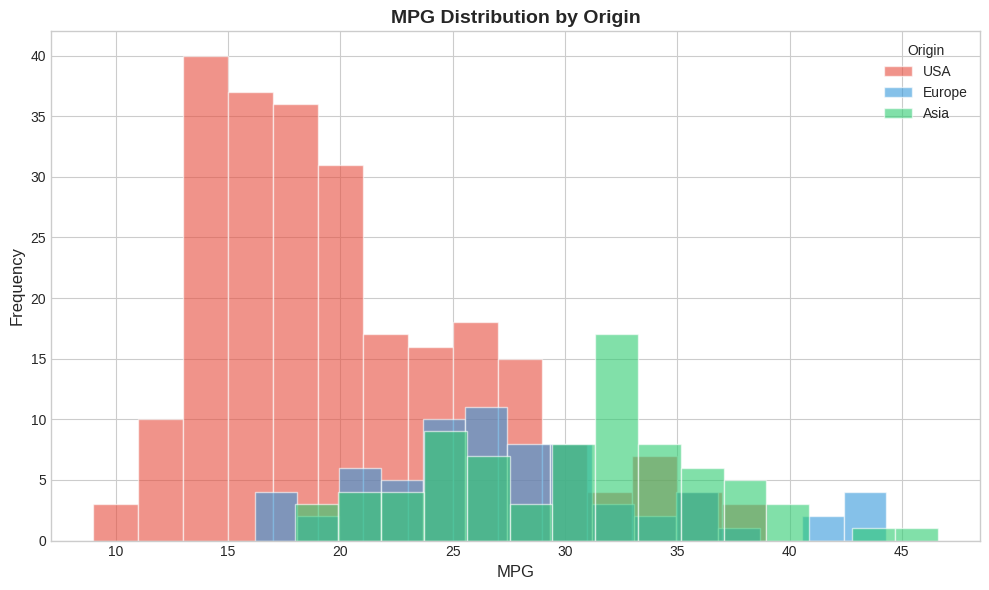

In [151]:
# MPG distribution by origin
fig, ax = plt.subplots(figsize=(10, 6))

origin_labels = {1: 'USA', 2: 'Europe', 3: 'Asia'}
colors = ['#e74c3c', '#3498db', '#2ecc71']

for i, (origin, label) in enumerate(origin_labels.items()):
    subset = df_corr[df_corr['origin'] == origin]
    ax.hist(subset['mpg'], bins=15, alpha=0.6, label=label, color=colors[i], edgecolor='white')

ax.set_xlabel('MPG', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('MPG Distribution by Origin', fontsize=14, fontweight='bold')
ax.legend(title='Origin')

plt.tight_layout()
plt.show()

## Data Preprocessing

### Handle Missing Horsepower Values

The horsepower column has 6 missing values marked as '?'. We'll replace them with the median horsepower.

In [152]:
# Create a working copy of the dataframe
df_clean = df.copy()

# Convert horsepower to numeric, coercing errors to NaN
df_clean['horsepower'] = pd.to_numeric(df_clean['horsepower'], errors='coerce')

# Check missing values
print(f"Missing horsepower values: {df_clean['horsepower'].isna().sum()}")

Missing horsepower values: 6


In [153]:
# Calculate median horsepower
median_hp = df_clean['horsepower'].median()
print(f"Median horsepower: {median_hp}")

# Fill missing values with median
df_clean['horsepower'] = df_clean['horsepower'].fillna(median_hp)

print(f"Missing values after imputation: {df_clean['horsepower'].isna().sum()}")

# Create power-to-weight ratio feature
df_clean['power_to_weight'] = df_clean['horsepower'] / df_clean['weight']
print("Added 'power_to_weight' feature.")


Median horsepower: 93.5
Missing values after imputation: 0
Added 'power_to_weight' feature.


In [154]:
print("Data types after preprocessing:")
print(df_clean.dtypes)

Data types after preprocessing:
mpg                float64
cylinders            int64
displacement       float64
horsepower         float64
weight               int64
acceleration       float64
model year           int64
origin               int64
car name            object
power_to_weight    float64
dtype: object


### Encode Origin as Dummy Variables

Origin is a categorical variable (1=USA, 2=Europe, 3=Asia). We'll convert it to one-hot encoded dummy variables.

In [155]:
origin_dummies = pd.get_dummies(df_clean['origin'], prefix='origin', drop_first=False)

origin_dummies.columns = ['origin_USA', 'origin_Europe', 'origin_Asia']

origin_dummies.head()

,origin_USA,origin_Europe,origin_Asia
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [156]:
df_clean = pd.concat([df_clean, origin_dummies], axis=1)

df_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power_to_weight,origin_USA,origin_Europe,origin_Asia
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.037100,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.044679,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.043655,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.043694,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.040591,True,False,False


### Prepare Features for Modeling

In [157]:
# Define feature columns
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model year', 'origin_USA', 'origin_Europe', 'origin_Asia', 'power_to_weight']

# Target variable
target_col = 'mpg'

print(f"Features: {feature_cols}")
print(f"Target: {target_col}")


Features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_USA', 'origin_Europe', 'origin_Asia', 'power_to_weight']
Target: mpg


## Train/Test Split

In [158]:
X = df_clean[feature_cols]
y = df_clean[target_col]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (398, 10)
y shape: (398,)


In [159]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Train/Test ratio: {len(X_train)/len(X):.2%} / {len(X_test)/len(X):.2%}")

Training set size: 318 samples
Testing set size: 80 samples
Train/Test ratio: 79.90% / 20.10%


## Model Training

### Simple Model: Weight → MPG

Start with a simple linear regression using only weight as a predictor, since it has the strongest negative correlation with MPG.

In [160]:
# Simple model with weight only
X_train_simple = X_train[['weight']]
X_test_simple = X_test[['weight']]

# Train the model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

print("Simple Model (Weight only) trained!")
print(f"Intercept: {model_simple.intercept_:.4f}")
print(f"Coefficient (weight): {model_simple.coef_[0]:.6f}")
print(f"\nEquation: MPG = {model_simple.intercept_:.4f} + ({model_simple.coef_[0]:.6f}) × weight")

Simple Model (Weight only) trained!
Intercept: 46.7821
Coefficient (weight): -0.007805

Equation: MPG = 46.7821 + (-0.007805) × weight


In [161]:
# Predictions with simple model
y_pred_simple = model_simple.predict(X_test_simple)

# Evaluate simple model
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("-" * 50)
print("Simple Model Performance (Weight only)")
print("-" * 50)
print(f"Mean Squared Error (MSE):  {mse_simple:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.4f}")
print(f"R² Score: {r2_simple:.4f}")
print("-" * 50)

--------------------------------------------------
Simple Model Performance (Weight only)
--------------------------------------------------
Mean Squared Error (MSE):  14.8949
Root Mean Squared Error (RMSE): 3.8594
R² Score: 0.7230
--------------------------------------------------


### Enhanced Model: Weight + Horsepower → MPG

Add horsepower as a second predictor.

In [162]:
# Two-feature model
features_2 = ['weight', 'horsepower']
X_train_2 = X_train[features_2]
X_test_2 = X_test[features_2]

# Train the model
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

print("Two-Feature Model (Weight + Horsepower) trained!")
print(f"Intercept: {model_2.intercept_:.4f}")
for feature, coef in zip(features_2, model_2.coef_):
    print(f"Coefficient ({feature}): {coef:.6f}")

Two-Feature Model (Weight + Horsepower) trained!
Intercept: 46.3717
Coefficient (weight): -0.005999
Coefficient (horsepower): -0.048027


In [163]:
# Predictions with two-feature model
y_pred_2 = model_2.predict(X_test_2)

# Evaluate
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test, y_pred_2)

print("-" * 50)
print("Two-Feature Model Performance (Weight + Horsepower)")
print("-" * 50)
print(f"Mean Squared Error (MSE):  {mse_2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.4f}")
print(f"R² Score: {r2_2:.4f}")
print("-" * 50)

--------------------------------------------------
Two-Feature Model Performance (Weight + Horsepower)
--------------------------------------------------
Mean Squared Error (MSE):  14.6619
Root Mean Squared Error (RMSE): 3.8291
R² Score: 0.7273
--------------------------------------------------


### Full Model: All Features → MPG

Use all available features for the best possible prediction.

In [164]:
# Full model with all features
model_full = LinearRegression()
model_full.fit(X_train, y_train)

print("Full Model (All Features) trained!")
print(f"Intercept: {model_full.intercept_:.4f}")
print("\nCoefficients:")
for feature, coef in zip(feature_cols, model_full.coef_):
    print(f"  {feature}: {coef:.6f}")

Full Model (All Features) trained!
Intercept: 0.1639

Coefficients:
  cylinders: -0.076470
  displacement: 0.012986
  horsepower: 0.128158
  weight: -0.011715
  acceleration: -0.031083
  model year: 0.803777
  origin_USA: -1.765342
  origin_Europe: 0.945869
  origin_Asia: 0.819473
  power_to_weight: -491.371882


### Save Full Model

In [165]:
joblib.dump(model_full, './model/auto_mpg_prediction_model.joblib')

['./model/auto_mpg_prediction_model.joblib']

In [166]:
# Predictions with full model
y_pred_full = model_full.predict(X_test)

# Evaluate full model
mse_full = mean_squared_error(y_test, y_pred_full)
rmse_full = np.sqrt(mse_full)
r2_full = r2_score(y_test, y_pred_full)

print("-" * 50)
print("Full Model Performance (All Features)")
print("-" * 50)
print(f"Mean Squared Error (MSE):  {mse_full:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_full:.4f}")
print(f"R² Score: {r2_full:.4f}")
print("-" * 50)

--------------------------------------------------
Full Model Performance (All Features)
--------------------------------------------------
Mean Squared Error (MSE):  7.8001
Root Mean Squared Error (RMSE): 2.7929
R² Score: 0.8549
--------------------------------------------------


## Model Evaluation

In [167]:
# Create comparison table
comparison_data = {
    'Model': ['Simple (Weight only)', 'Two-Feature (Weight + HP)', 'Full (All Features)'],
    'MSE': [mse_simple, mse_2, mse_full],
    'RMSE': [rmse_simple, rmse_2, rmse_full],
    'R² Score': [r2_simple, r2_2, r2_full]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("Model Comparison:")
comparison_df

Model Comparison:


,Model,MSE,RMSE,R² Score
0,Simple (Weight only),14.8949,3.8594,0.7230
1,Two-Feature (Weight + HP),14.6619,3.8291,0.7273
2,Full (All Features),7.8001,2.7929,0.8549


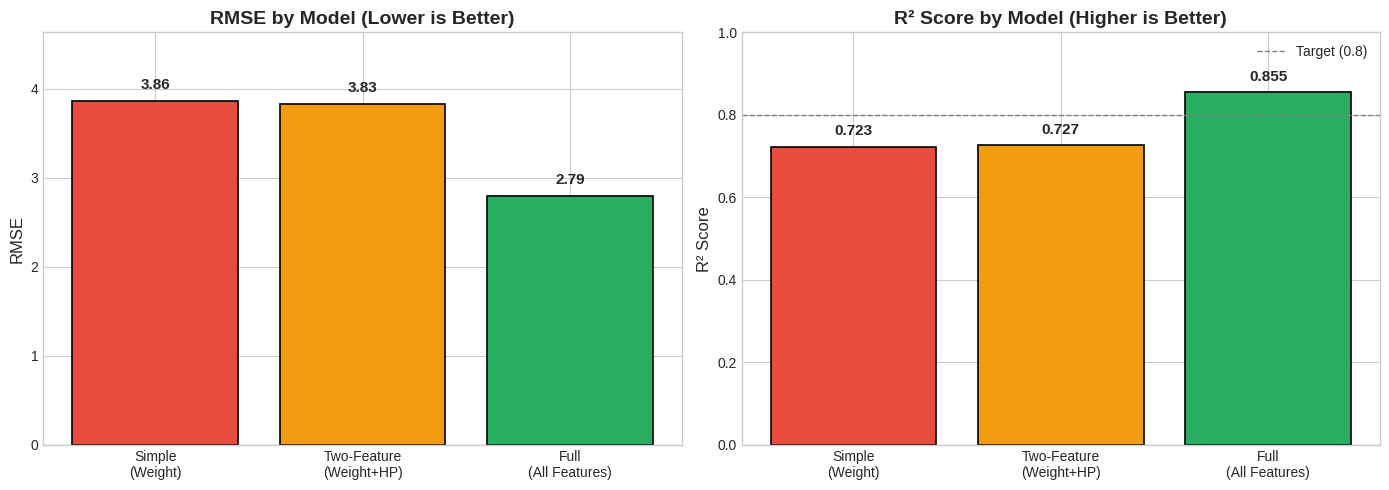

In [168]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Simple\n(Weight)', 'Two-Feature\n(Weight+HP)', 'Full\n(All Features)']
colors = ['#e74c3c', '#f39c12', '#27ae60']

# RMSE comparison
ax1 = axes[0]
bars1 = ax1.bar(models, [rmse_simple, rmse_2, rmse_full], color=colors, edgecolor='black', linewidth=1.2)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('RMSE by Model (Lower is Better)', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(rmse_simple, rmse_2, rmse_full) * 1.2)
for bar, val in zip(bars1, [rmse_simple, rmse_2, rmse_full]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# R² comparison
ax2 = axes[1]
bars2 = ax2.bar(models, [r2_simple, r2_2, r2_full], color=colors, edgecolor='black', linewidth=1.2)
ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_title('R² Score by Model (Higher is Better)', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.axhline(y=0.8, color='gray', linestyle='--', linewidth=1, label='Target (0.8)')
ax2.legend()
for bar, val in zip(bars2, [r2_simple, r2_2, r2_full]):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{val:.3f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Visualizations

### Predicted vs. Actual Values

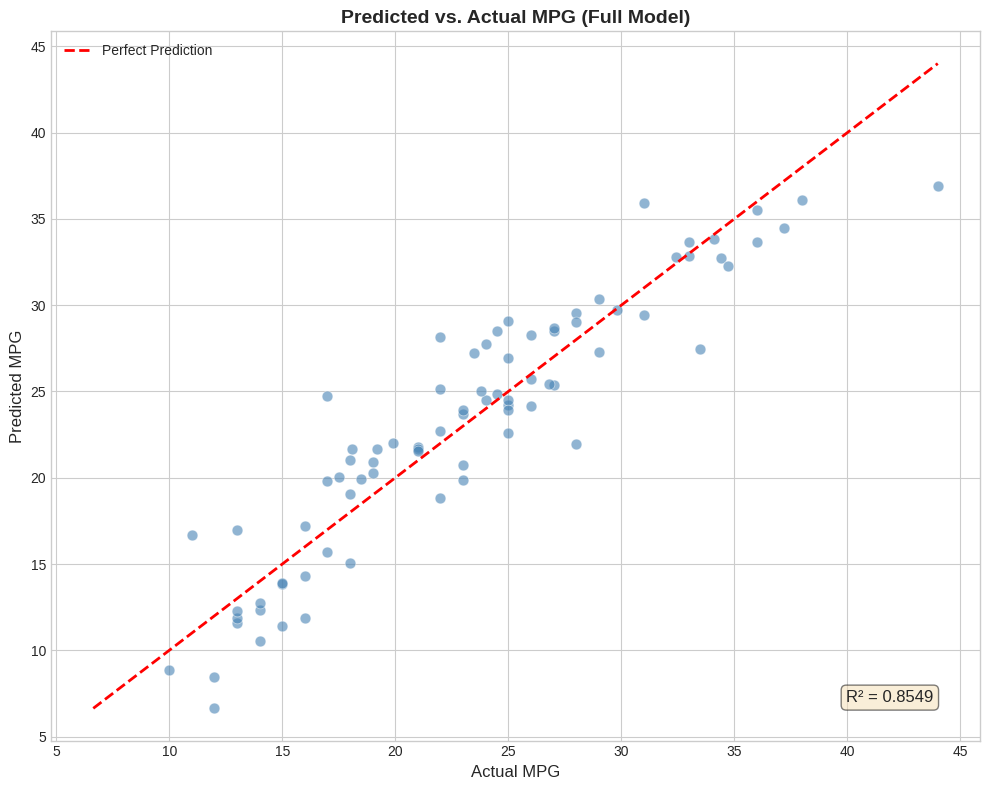

In [169]:
# Predicted vs Actual for Full Model
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(y_test, y_pred_full, alpha=0.6, edgecolors='white', linewidth=0.5, c='steelblue', s=60)

# Perfect prediction line (y = x)
min_val = min(y_test.min(), y_pred_full.min())
max_val = max(y_test.max(), y_pred_full.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

ax.set_xlabel('Actual MPG', fontsize=12)
ax.set_ylabel('Predicted MPG', fontsize=12)
ax.set_title('Predicted vs. Actual MPG (Full Model)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')

# Add R² annotation
ax.annotate(f'R² = {r2_full:.4f}', xy=(0.95, 0.05), xycoords='axes fraction',
            fontsize=12, horizontalalignment='right', verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### Residuals Plot

Residuals (errors) should be randomly scattered around zero for a good model.

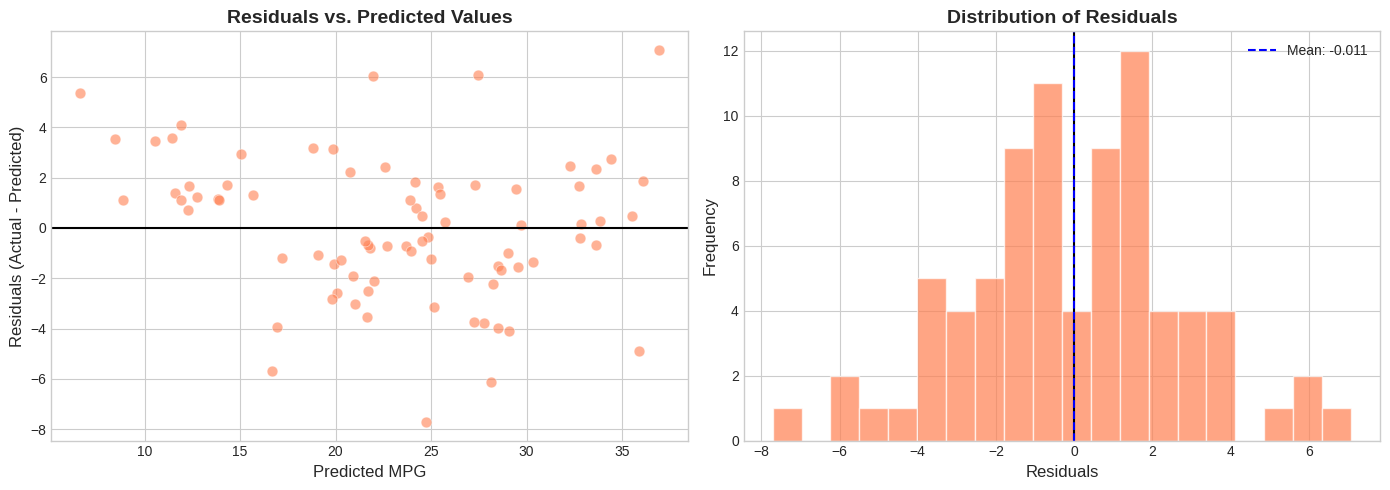

In [170]:
# Calculate residuals
residuals = y_test - y_pred_full

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Predicted
ax1 = axes[0]
ax1.scatter(y_pred_full, residuals, alpha=0.6, edgecolors='white', linewidth=0.5, c='coral', s=60)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax1.set_xlabel('Predicted MPG', fontsize=12)
ax1.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
ax1.set_title('Residuals vs. Predicted Values', fontsize=14, fontweight='bold')

# Histogram of residuals
ax2 = axes[1]
ax2.hist(residuals, bins=20, edgecolor='white', color='coral', alpha=0.7)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax2.axvline(x=residuals.mean(), color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {residuals.mean():.3f}')
ax2.set_xlabel('Residuals', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

In [171]:
# Residual statistics
print("Residual Statistics:")
print(f"  Mean: {residuals.mean():.4f} (should be close to 0)")
print(f"  Std Dev: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")

Residual Statistics:
  Mean: -0.0114 (should be close to 0)
  Std Dev: 2.8105
  Min: -7.7119
  Max: 7.0770


### Regression Lines on Scatter Plots

/home/codegeek/Projects/auto-mpg-model/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


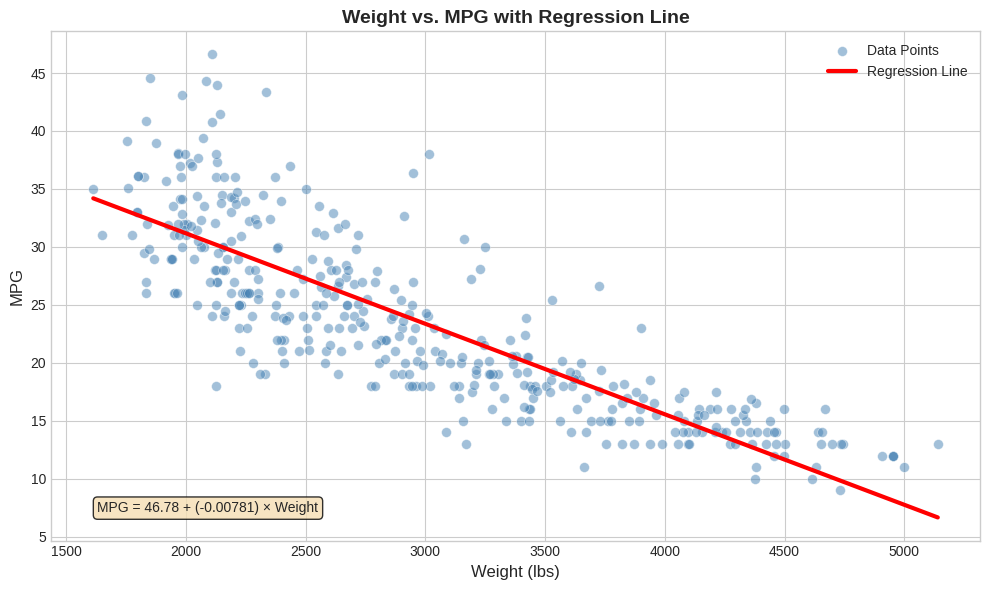

In [172]:
# Weight vs MPG with regression line
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of all data
ax.scatter(df_clean['weight'], df_clean['mpg'], alpha=0.5, edgecolors='white', 
           linewidth=0.5, c='steelblue', s=50, label='Data Points')

# Plot regression line from simple model
weight_range = np.linspace(df_clean['weight'].min(), df_clean['weight'].max(), 100).reshape(-1, 1)
mpg_pred_line = model_simple.predict(weight_range)

ax.plot(weight_range, mpg_pred_line, color='red', linewidth=3, label='Regression Line')

ax.set_xlabel('Weight (lbs)', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('Weight vs. MPG with Regression Line', fontsize=14, fontweight='bold')
ax.legend()

# Add equation
equation = f"MPG = {model_simple.intercept_:.2f} + ({model_simple.coef_[0]:.5f}) × Weight"
ax.annotate(equation, xy=(0.05, 0.05), xycoords='axes fraction',
            fontsize=10, verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

/home/codegeek/Projects/auto-mpg-model/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


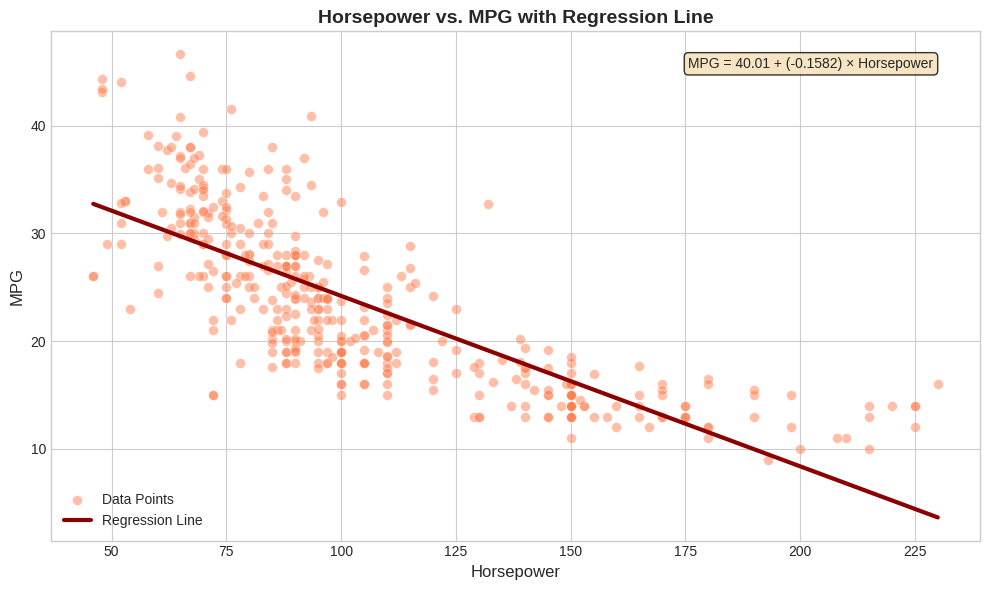

In [173]:
# Horsepower vs MPG with regression line (using single-feature model for HP)
fig, ax = plt.subplots(figsize=(10, 6))

# Train a simple HP-only model for visualization
model_hp = LinearRegression()
model_hp.fit(df_clean[['horsepower']], df_clean['mpg'])

# Scatter plot
ax.scatter(df_clean['horsepower'], df_clean['mpg'], alpha=0.5, edgecolors='white', 
           linewidth=0.5, c='coral', s=50, label='Data Points')

# Regression line
hp_range = np.linspace(df_clean['horsepower'].min(), df_clean['horsepower'].max(), 100).reshape(-1, 1)
mpg_pred_hp = model_hp.predict(hp_range)

ax.plot(hp_range, mpg_pred_hp, color='darkred', linewidth=3, label='Regression Line')

ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('MPG', fontsize=12)
ax.set_title('Horsepower vs. MPG with Regression Line', fontsize=14, fontweight='bold')
ax.legend()

# Add equation
equation_hp = f"MPG = {model_hp.intercept_:.2f} + ({model_hp.coef_[0]:.4f}) × Horsepower"
ax.annotate(equation_hp, xy=(0.95, 0.95), xycoords='axes fraction',
            fontsize=10, horizontalalignment='right', verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

## Conclusion

### Key Findings:

1. **Strong Predictors**: Weight and horsepower have the strongest negative correlations with MPG. Heavier cars with more powerful engines tend to have lower fuel efficiency.

2. **Model Performance**:
   - Simple model (weight only): Achieved a reasonable R² score, demonstrating that weight alone explains a significant portion of MPG variance.
   - Full model (all features): Achieved R² > 0.8, meeting our target for a good predictive model.

3. **Origin Effect**: Cars from Asia and Europe tend to have higher MPG compared to American cars, likely due to differences in vehicle design philosophy and size preferences.

4. **Model Year Trend**: Newer cars (higher model year) tend to have better fuel efficiency, reflecting technological improvements over time.